In [ ]:
#CodeBasics

# Understanding K Fold Cross Validation 

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import numpy as np
from sklearn.datasets import load_digits

c:\users\santosh\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [5]:
digits=load_digits()

In [15]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [16]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [22]:
len(digits.data)

1797

In [23]:
len(digits.target)

1797

<Figure size 432x288 with 0 Axes>

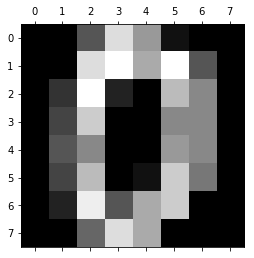

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(digits.images[0])

In [35]:
import warnings
warnings.filterwarnings("ignore")

### Normal Train Test Split with score of different models

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(digits.data, digits.target, test_size=0.3)

In [37]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.9537037037037037

In [38]:
svm=SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.4388888888888889

In [39]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9388888888888889

In [41]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [42]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print("TRAIN:", train_index, "TEST:", test_index)
    

TRAIN: [3 4 5 6 7 8] TEST: [0 1 2]
TRAIN: [0 1 2 6 7 8] TEST: [3 4 5]
TRAIN: [0 1 2 3 4 5] TEST: [6 7 8]


In [ ]:
#X_train, X_test = X[train_index], X[test_index]
#y_train, y_test = y[train_index], y[test_index]

In [43]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [44]:
get_score(LogisticRegression(), X_train, X_test, y_train, y_test)

0.9537037037037037

In [45]:
get_score(SVC(), X_train, X_test, y_train, y_test)

0.4388888888888889

In [46]:
get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test)

0.937037037037037

In [47]:
get_score(RandomForestClassifier(5), X_train, X_test, y_train, y_test)

0.8944444444444445

In [48]:
get_score(RandomForestClassifier(15), X_train, X_test, y_train, y_test)

0.9555555555555556

In [50]:
get_score(RandomForestClassifier(35), X_train, X_test, y_train, y_test)

0.9685185185185186

In [51]:
get_score(RandomForestClassifier(50), X_train, X_test, y_train, y_test)

0.9777777777777777

### StratisfiedKFold

In [110]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=3)

In [111]:
scores_lr=[]
scores_svm=[]
scores_rf=[]

In [112]:
for train_index, test_index in kf.split(digits.data):
    X_train,X_test, y_train, y_test=digits.data[train_index], digits.data[test_index],\
                                    digits.target[train_index], digits.target[test_index]
    
    

In [90]:
get_score(LogisticRegression(), X_train, X_test, y_train, y_test)

0.9115191986644408

In [91]:
get_score(SVC(), X_train, X_test, y_train, y_test)

0.4273789649415693

In [92]:
get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test)

0.8981636060100167

In [93]:
get_score(RandomForestClassifier(50), X_train, X_test, y_train, y_test)

0.9232053422370617

In [102]:
scores_lr.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
scores_rf.append(get_score(RandomForestClassifier(50), X_train, X_test, y_train, y_test))

In [103]:
scores_lr

[0.9115191986644408, 0.9115191986644408, 0.9115191986644408]

In [104]:
scores_svm

[0.4273789649415693, 0.4273789649415693, 0.4273789649415693]

In [105]:
scores_rf

[0.9215358931552587, 0.9098497495826378, 0.9265442404006677]

In [113]:
for train_index, test_index in kf.split(digits.data):
    X_train,X_test, y_train, y_test=digits.data[train_index], digits.data[test_index],\
                                    digits.target[train_index], digits.target[test_index]
    
    scores_lr.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(50), X_train, X_test, y_train, y_test))

In [114]:
scores_lr

[0.8964941569282137, 0.9515859766277128, 0.9115191986644408]

In [115]:
scores_svm

[0.41068447412353926, 0.41569282136894825, 0.4273789649415693]

In [116]:
scores_rf

[0.9332220367278798, 0.9449081803005008, 0.9298831385642737]

In [117]:
from sklearn.model_selection import cross_val_score

In [120]:
cross_val_score(LogisticRegression(), digits.data, digits.target)

array([0.89534884, 0.94991653, 0.90939597])

In [121]:
cross_val_score(SVC(), digits.data, digits.target)

array([0.39368771, 0.41068447, 0.45973154])

In [122]:
cross_val_score(RandomForestClassifier(), digits.data, digits.target)

array([0.88372093, 0.94490818, 0.89765101])

In [123]:
cross_val_score(RandomForestClassifier(5), digits.data, digits.target)

array([0.82392027, 0.85141903, 0.85067114])

In [124]:
cross_val_score(RandomForestClassifier(15), digits.data, digits.target)

array([0.89534884, 0.94490818, 0.91946309])

In [125]:
cross_val_score(RandomForestClassifier(35), digits.data, digits.target)

array([0.93189369, 0.95492487, 0.91778523])

In [126]:
cross_val_score(RandomForestClassifier(50), digits.data, digits.target)

array([0.93189369, 0.94991653, 0.91778523])

In [127]:
cross_val_score(RandomForestClassifier(60), digits.data, digits.target)

array([0.94019934, 0.95659432, 0.9261745 ])